In [23]:
import numpy as np
import pandas as pd
import tensorflow as tf     #Import Libraries

In [24]:
tf.__version__

'2.2.0'

In [25]:
from google.colab import drive 

In [26]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
dataset = pd.read_excel('/content/drive/My Drive/ANN_Regression/Folds5x2_pp.xlsx')     #Load dataset

In [28]:
dataset.shape

(9568, 5)

In [29]:
dataset.head(10)

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
5,26.27,59.44,1012.23,58.77,443.67
6,15.89,43.96,1014.02,75.24,467.35
7,9.48,44.71,1019.12,66.43,478.42
8,14.64,45.00,1021.78,41.25,475.98
9,11.74,43.56,1015.14,70.72,477.50


In [30]:
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, -1].values                 # Feature Selection

In [31]:
print(X), print(Y)

[[  14.96   41.76 1024.07   73.17]
 [  25.18   62.96 1020.04   59.08]
 [   5.11   39.4  1012.16   92.14]
 ...
 [  31.32   74.33 1012.92   36.48]
 [  24.48   69.45 1013.86   62.39]
 [  21.6    62.52 1017.23   67.87]]
[463.26 444.37 488.56 ... 429.57 435.74 453.28]


(None, None)

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.2, random_state = 0)                #Splitting X and Y

In [33]:
ann = tf.keras.models.Sequential()                      

In [34]:
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))      #First Hidden layer

In [35]:
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))      #Second Hidden layer

In [36]:
ann.add(tf.keras.layers.Dense(units = 1))            #Output layer

In [37]:
ann.compile(optimizer = 'adam', loss = 'mean_squared_error')      #Compiling ANN

In [38]:
ann.fit(X_train, Y_train, batch_size = 32, epochs = 100)         #Fitting the ANN model

Epoch 1/100
240/240 [==============================] - 0s 1ms/step - loss: 92903.9453
Epoch 2/100
240/240 [==============================] - 0s 1ms/step - loss: 724.0522
Epoch 3/100
240/240 [==============================] - 0s 1ms/step - loss: 252.1810
Epoch 4/100
240/240 [==============================] - 0s 1ms/step - loss: 246.8547
Epoch 5/100
240/240 [==============================] - 0s 1ms/step - loss: 240.3202
Epoch 6/100
240/240 [==============================] - 0s 1ms/step - loss: 232.9297
Epoch 7/100
240/240 [==============================] - 0s 1ms/step - loss: 224.5882
Epoch 8/100
240/240 [==============================] - 0s 1ms/step - loss: 215.3517
Epoch 9/100
240/240 [==============================] - 0s 1ms/step - loss: 205.1364
Epoch 10/100
240/240 [==============================] - 0s 1ms/step - loss: 194.3420
Epoch 11/100
240/240 [==============================] - 0s 1ms/step - loss: 183.1286
Epoch 12/100
240/240 [==============================] - 0s 1ms/step - lo

In [52]:
Y_pred_ann = ann.predict(X_test)      #Predicting output from ANN model

In [40]:
np.set_printoptions(precision = 2)
print(np.concatenate((Y_pred.reshape(len(Y_pred_ann),1), Y_test.reshape(len(Y_test),1)), 1))         #Comparing Y_test and predicted value from ANN

[[432.67 431.23]
 [463.76 460.01]
 [467.28 461.14]
 ...
 [474.46 473.26]
 [441.34 438.  ]
 [460.5  463.28]]


In [41]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred_ann))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred_ann))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_ann)))         #Calculating scores and error from ANN model

Mean Absolute Error: 4.150552607330035
Mean Squared Error: 26.521354774940672
Root Mean Squared Error: 5.149888811900765


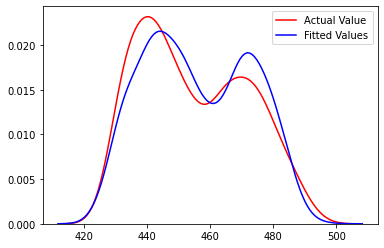

In [53]:
import seaborn as sns
ax1 = sns.distplot(Y_test, hist=False, color="r", label="Actual Value")
sns.distplot(Y_pred_ann, hist=False, color="b", label="Fitted Values" , ax=ax1)      #Visualizing by graph of ANN model

In [46]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)               #Linear regression Model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
Y_pred_reg = lin_reg.predict(X_test)     #Predicting from linear regression model

In [49]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred_reg))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred_reg))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_reg)))        #Calculating scores and error from linear regression model    

Mean Absolute Error: 3.5665646552038255
Mean Squared Error: 19.733699303497648
Root Mean Squared Error: 4.442262858442491


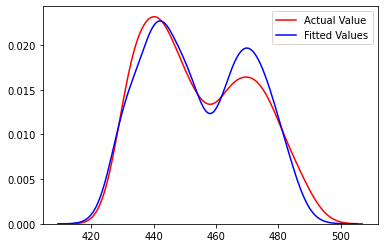

In [54]:
import seaborn as sns
ax1 = sns.distplot(Y_test, hist=False, color="r", label="Actual Value")
sns.distplot(Y_pred_reg, hist=False, color="b", label="Fitted Values" , ax=ax1)       #Visualizing by graph of ANN model

In [50]:
import pickle
pickle.dump(lin_reg, open('model.pkl','wb'))
model = pickle.load(open('model.pkl','rb'))               #creating pickle file